In [2]:
from sklearn.datasets import make_circles
no=1000
x,y=make_circles(no,noise=0.03,random_state=42)
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
import pandas as pd
circles=pd.DataFrame({"X0":x[:,0],"X1":x[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


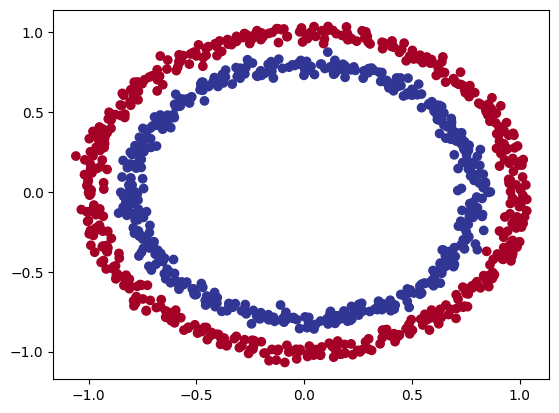

In [ ]:
#visualise with a plot
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
x.shape,y.shape

((1000, 2), (1000,))

In [ ]:
#TO FIND THE NUMBER OF SAMPLES
len(x),len(y)
x[0],y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
tf.random.set_seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
model=tf.keras.Sequential(
    [
    tf.keras.layers.Dense(100, input_shape=(None, 1)),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="relu")]
)
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.BinaryCrossentropy(),metrics=["accuracy"])
model.fit(x_train,y_train,epochs=50)


Epoch 1/50
22/22 [==============================] - 1s 2ms/step - loss: 2.5452 - accuracy: 0.4871
Epoch 2/50
22/22 [==============================] - 0s 2ms/step - loss: 1.2253 - accuracy: 0.4871
Epoch 3/50
22/22 [==============================] - 0s 2ms/step - loss: 1.1185 - accuracy: 0.4871
Epoch 4/50
22/22 [==============================] - 0s 2ms/step - loss: 1.0248 - accuracy: 0.4871
Epoch 5/50
22/22 [==============================] - 0s 2ms/step - loss: 0.9468 - accuracy: 0.4871
Epoch 6/50
22/22 [==============================] - 0s 2ms/step - loss: 0.8714 - accuracy: 0.4864
Epoch 7/50
22/22 [==============================] - 0s 3ms/step - loss: 0.8188 - accuracy: 0.4858
Epoch 8/50
22/22 [==============================] - 0s 2ms/step - loss: 0.7855 - accuracy: 0.4905
Epoch 9/50
22/22 [==============================] - 0s 3ms/step - loss: 0.7661 - accuracy: 0.4875
Epoch 10/50
22/22 [==============================] - 0s 2ms/step - loss: 0.7496 - accuracy: 0.4915
Epoch 11/50
22/22 [

In [ ]:
model.evaluate(x,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0987 - accuracy: 0.9910


[0.09866085648536682, 0.9909999966621399]

In [ ]:
import numpy as np
model.predict(x)
'''
take in a trained model,feature x and y
'''
def plot_decision_boundry(model,x,y):

  x_min, x_max=x[:,0].min() -0.1,x[:,0].max()+0.1
  y_min, y_max=x[:,1].min() -0.1,x[:,1].max()+0.1
  xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),
                    np.linspace(y_min,y_max,100))
  x_in=np.c_[xx.ravel(),yy.ravel()]
  y_pred=model.predict(x_in)
  #check if multiclass
  if len(y_pred[0])>1:
    y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    y_pred=np.round(np.max(y_pred,axis=1)).reshape(xx.shape)
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())



32/32 [==============================] - 0s 2ms/step


313/313 [==============================] - 0s 2ms/step


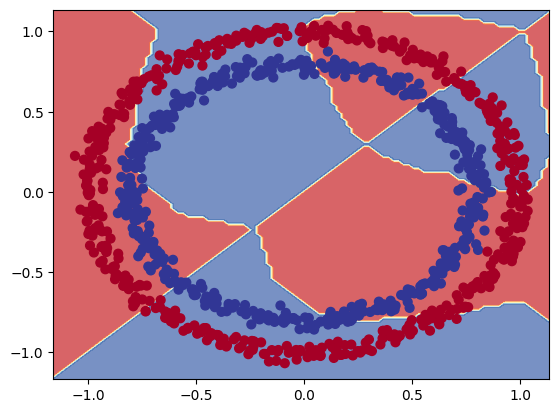

In [ ]:
plot_decision_boundry(model=model,x=x,y=y)

In [ ]:
# missing piece is non linearity
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model3.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=["accuracy"])
history=model3.fit(x_train,y_train,epochs=  100)

Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5157
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5443
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5686
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5686
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.5800
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.5771
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.6014
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.5757
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.6314
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.7086
Epoch 11/

Text(0.5, 1.0, 'model 8 loss curves')

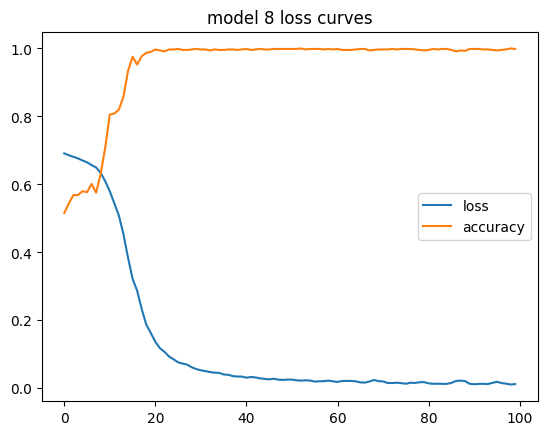

In [ ]:
import pandas as pd
df=pd.DataFrame(history.history).plot()
plt.title('model 8 loss curves')
#loss function going down prediction


In [ ]:
# method to find the ideal learning rate

313/313 [==============================] - 2s 7ms/step


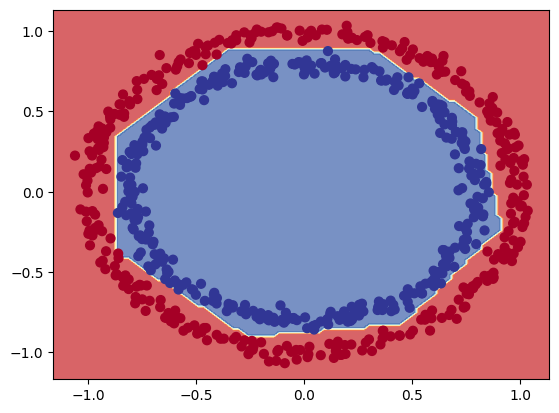

In [ ]:

plot_decision_boundry(model3,x_train,y_train)


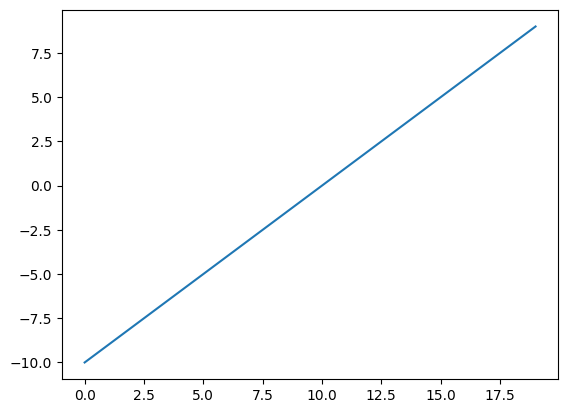

In [ ]:
a=tf.cast(tf.range(-10,10),tf.float32)
plt.plot(a)

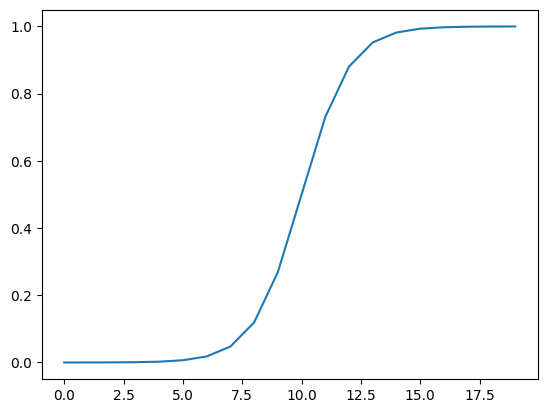

In [ ]:
import math
def sig(x):
  val= 1+tf.exp(-x)
  return (1/val)
sig_a=sig(a)
plt.plot(sig_a)

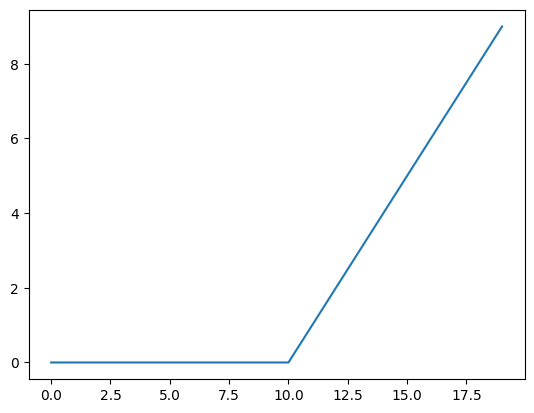

In [ ]:
def relu(x):
  return tf.maximum(x,0)
relu_a=relu(a)
plt.plot(relu_a)

##find the best learning rate
* learning rate callback -functionality add while it's trainning
* another model
* loss curve


In [ ]:
tf.random.set_seed(42)
model4=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model4.compile(metrics=["accuracy"],optimizer="Adam",loss="binary_crossentropy")
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *10 **(epoch/20))
history4=model4.fit(x_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
22/22 [==============================] - 2s 3ms/step - loss: 0.6964 - accuracy: 0.5157 - lr: 1.0000e-04
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.5171 - lr: 1.1220e-04
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6962 - accuracy: 0.5171 - lr: 1.2589e-04
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.6960 - accuracy: 0.5129 - lr: 1.4125e-04
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.6959 - accuracy: 0.5114 - lr: 1.5849e-04
Epoch 6/100
22/22 [==============================] - 0s 7ms/step - loss: 0.6958 - accuracy: 0.5086 - lr: 1.7783e-04
Epoch 7/100
22/22 [==============================] - 0s 6ms/step - loss: 0.6956 - accuracy: 0.5071 - lr: 1.9953e-04
Epoch 8/100
22/22 [==============================] - 0s 6ms/step - loss: 0.6955 - accuracy: 0.5071 - lr: 2.2387e-04
Epoch 9/100
22/22 [==============================] - 0s 5ms/step - loss:

<Axes: xlabel='epochs'>

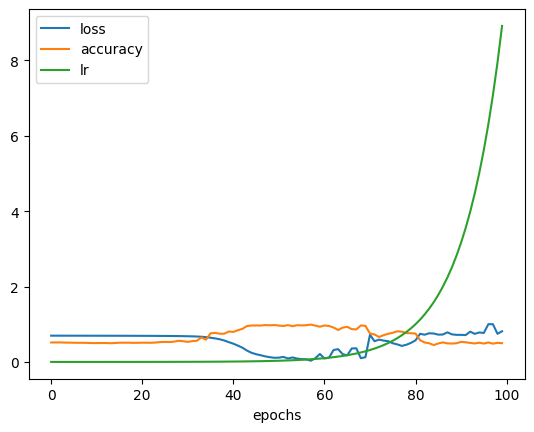

In [ ]:
pd.DataFrame(history4.history).plot(xlabel="epochs")

Text(0, 0.5, 'loss')

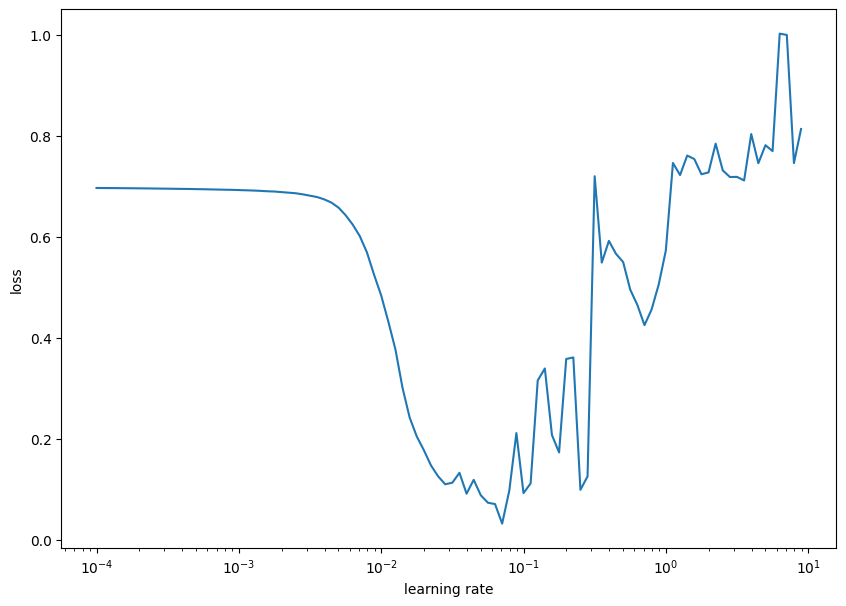

In [ ]:
#plot the learning rate vs loss
lrs=1e-4 * (10 ** (tf.range(0,100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history4.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title()

In [ ]:
model5=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])
model5.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),metrics=['accuracy'])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **((epoch)/10))
history5=model5.fit(x_train,y_train,epochs=20)

Epoch 1/20
22/22 [==============================] - 2s 7ms/step - loss: 0.6940 - accuracy: 0.5071
Epoch 2/20
22/22 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5271
Epoch 3/20
22/22 [==============================] - 0s 4ms/step - loss: 0.6882 - accuracy: 0.5671
Epoch 4/20
22/22 [==============================] - 0s 3ms/step - loss: 0.6800 - accuracy: 0.5886
Epoch 5/20
22/22 [==============================] - 0s 3ms/step - loss: 0.6585 - accuracy: 0.6557
Epoch 6/20
22/22 [==============================] - 0s 4ms/step - loss: 0.6205 - accuracy: 0.7243
Epoch 7/20
22/22 [==============================] - 0s 3ms/step - loss: 0.5785 - accuracy: 0.7429
Epoch 8/20
22/22 [==============================] - 0s 3ms/step - loss: 0.5008 - accuracy: 0.8643
Epoch 9/20
22/22 [==============================] - 0s 3ms/step - loss: 0.4277 - accuracy: 0.8843
Epoch 10/20
22/22 [==============================] - 0s 3ms/step - loss: 0.3415 - accuracy: 0.9600
Epoch 11/20
22/22 [

In [ ]:
model5.evaluate(x_test,y_test)

10/10 [==============================] - 1s 4ms/step - loss: 0.0808 - accuracy: 0.9900


[0.08079883456230164, 0.9900000095367432]

In [ ]:
model3.evaluate(x_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 1.0000


[0.012497931718826294, 1.0]

313/313 [==============================] - 1s 4ms/step


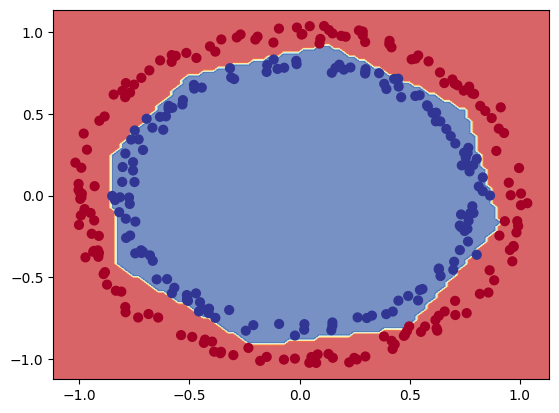

In [ ]:
plot_decision_boundry(model5,x_test,y_test)

In [ ]:
loss,accuracy=model5.evaluate(x_test,y_test)
print("loss ,",loss)
print("accuracy",accuracy*100)

10/10 [==============================] - 0s 3ms/step - loss: 0.0808 - accuracy: 0.9900
loss , 0.08079883456230164
accuracy 99.00000095367432


10/10 [==============================] - 0s 2ms/step


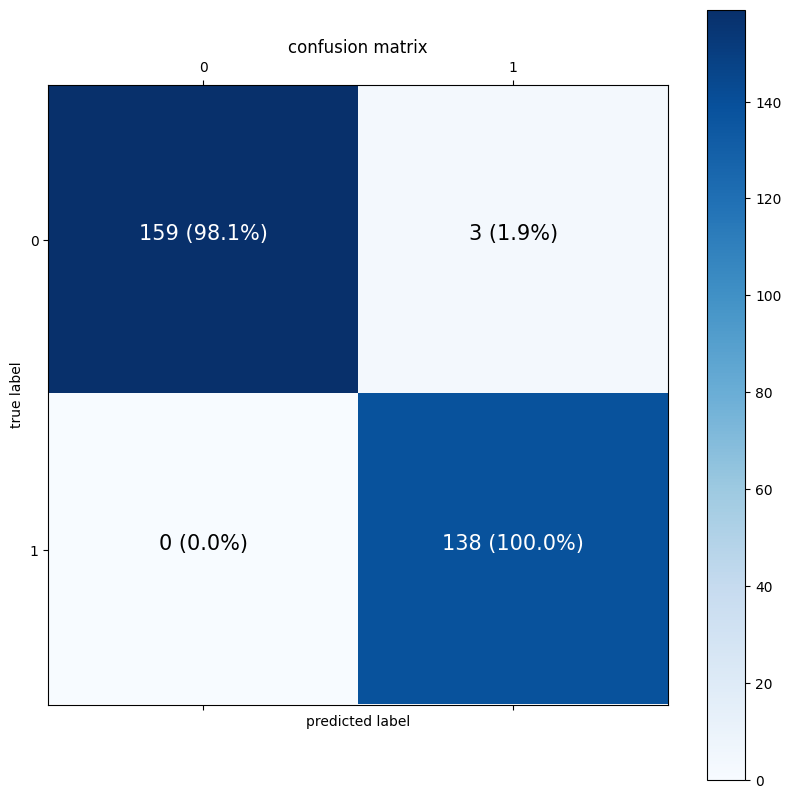

In [ ]:
#create a confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
figsize=(10,10)
y_pred=model5.predict(x_test)
y_pred_bin=tf.round(y_pred)
cm=confusion_matrix(y_pred_bin,y_test)
cm_norm= cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
n_classes=cm.shape[0]
fig,ax=plt.subplots(figsize=figsize)
#prettify
cax=ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

classes=False
if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])
ax.set(title="confusion matrix",xlabel="predicted label",ylabel="true label",xticks=np.arange(n_classes),yticks=np.arange(n_classes),xticklabels=labels,yticklabels=labels)

threshold=(cm.max()+cm.min())/2.
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)

##working with a multi class classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()
print("train_data",train_data,"train_label",train_labels)

4422102/4422102 [==============================] - 0s 0us/step
train_data [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] train_label [9 0 0 ... 3 0 5]


In [ ]:
train_data[0].shape,train_labels[0].shape

((28, 28), ())

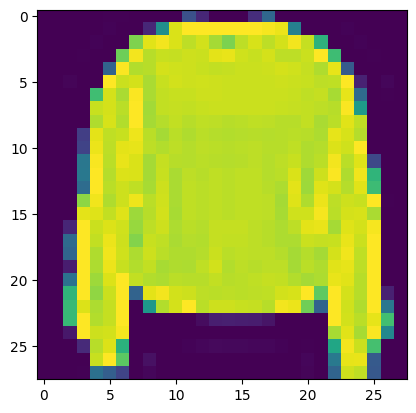

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7] )

In [ ]:
#create a small list so that we can index onto our trainnig labels so they're human-readable
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

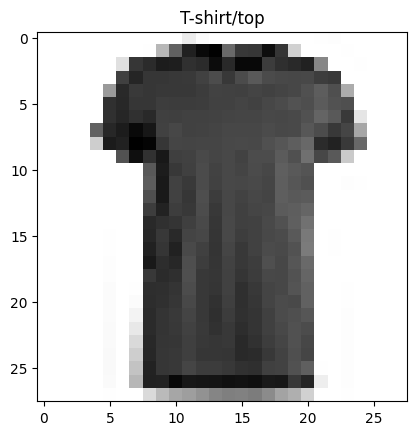

In [ ]:
index=17
plt.imshow(train_data[index],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]])

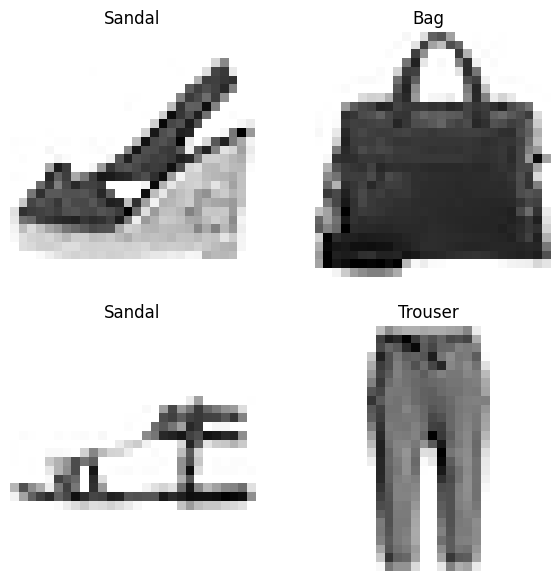

In [ ]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax=plt.subplot(2,2,i+1)
  rand_index=random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [ ]:
##building a multiclass
#input shape 28*28
#output shape 10
#loss function=tf.keras.losses.categoricalcrossentropy() categorical cross entropy requires one hot encoding format but we can use SparseCtegoricalCrossentropy
#

no_class=len(class_names)
multi_class_model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    #flatten data
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
multi_class_model.compile(optimizer="Adam",metrics=["accuracy"],loss=tf.keras.losses.CategoricalCrossentropy())
multi_class_history=multi_class_model.fit(train_data,tf.one_hot(train_labels,depth=10),epochs=10,validation_data=(test_data,tf.one_hot(test_labels,depth=10)))


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.7457 - accuracy: 0.1135 - val_loss: 2.1910 - val_accuracy: 0.1743
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1047 - accuracy: 0.1775 - val_loss: 2.0531 - val_accuracy: 0.2011
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8253 - accuracy: 0.2537 - val_loss: 1.6694 - val_accuracy: 0.3143
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6361 - accuracy: 0.3164 - val_loss: 1.6138 - val_accuracy: 0.3247
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5817 - accuracy: 0.3344 - val_loss: 1.6054 - val_accuracy: 0.3362
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4650 - accuracy: 0.3871 - val_loss: 1.3365 - val_accuracy: 0.4402
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3076 - accuracy: 0.4374 - val_loss: 1.2922 - val_accuracy:

In [ ]:
multi_class_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
Total params: 8070 (31.52 KB)
Trainable params: 8070 (31.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_data.min(),train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized) this means they like to have numbers in the range between 0,1



In [ ]:
#divide by the maximum no
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0
train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [ ]:
import tensorflow as tf
multi_class_model2=tf.keras.Sequential(
    [tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(10,activation='softmax')]
)
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 *(10 **(epoch/10)))
multi_class_model2.compile(optimizer="Adam",metrics=["accuracy"],loss=tf.keras.losses.CategoricalCrossentropy())
norm_history=multi_class_model2.fit(train_data_norm,tf.one_hot(train_labels,depth=10),epochs=40,validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)),callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 12s 6ms/step - loss: 2.1519 - accuracy: 0.1587 - val_loss: 2.0416 - val_accuracy: 0.1850 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.9040 - accuracy: 0.2249 - val_loss: 1.7383 - val_accuracy: 0.2705 - lr: 1.2589e-04
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6424 - accuracy: 0.2771 - val_loss: 1.5791 - val_accuracy: 0.3008 - lr: 1.5849e-04
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5139 - accuracy: 0.3128 - val_loss: 1.4676 - val_accuracy: 0.3397 - lr: 1.9953e-04
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4034 - accuracy: 0.4006 - val_loss: 1.3602 - val_accuracy: 0.4275 - lr: 2.5119e-04
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3052 - accuracy: 0.4401 - val_loss: 1.2750 - val_accuracy: 0.4472 - lr: 3.1623e-04
Epoch 7/40
1875/1875 [===========

In [1]:
import pandas as pd
pd.DataFrame(norm_history.history).plot(title="normalised data")
pd.DataFrame(multi_class_history.history).plot(title="unnormalised data")

NameError: name 'norm_history' is not defined

Text(0.5, 1.0, 'Finding the ideal learn')

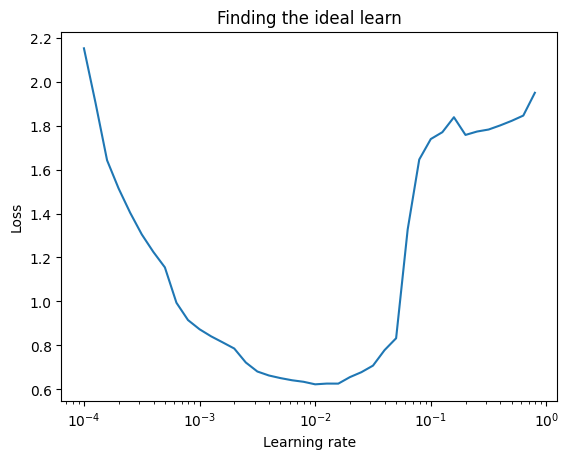

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
lrs=1e-4 * (10 **(tf.range(40)/10))
plt.semilogx(lrs,norm_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learn")

In [ ]:
y_pred_norm=multi_class_model2.evaluate(test_data_norm)

313/313 [==============================] - 2s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


1/1 [==============================] - 0s 167ms/step


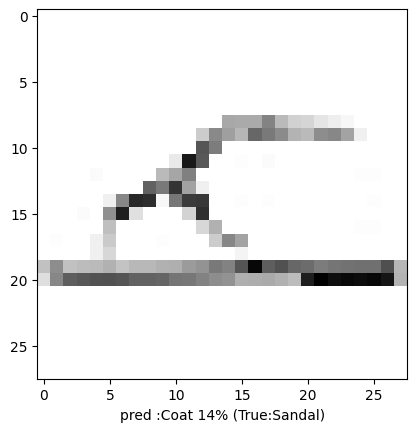

In [ ]:
import random
def plot_random_image(model,images,true_labels,classes):
  i=random.randint(0,len(images))
  target_image=images[i]
  pred_probs=model.predict(target_image.reshape(1,28,28))
  pred_label=classes[pred_probs.argmax()]
  true_label=classes[true_labels[i]]
  plt.imshow(target_image,cmap=plt.cm.binary)
  #change the color of the title depending on if the prediction is right r wrong
  if pred_label== true_label:
    color="green"
  else:
    color="red"
  plt.xlabel("pred :{} {:2.0f}% (True:{})".format(pred_label,100*tf.reduce_max(pred_probs),true_label))
plot_random_image(model=multi_class_model2,images=test_data,true_labels=test_labels,classes=class_names)

In [ ]:
multi_class_model2.layers

In [ ]:
multi_class_model2.layers[1]


In [ ]:
weight,biases=multi_class_model2.layers[1].get_weights()
weight,weight.shape

(array([[ 1.6938407 , -3.3607976 ,  1.2811991 , -4.904066  ],
        [ 4.319437  ,  5.062432  , -4.293746  , -0.45089105],
        [ 4.7627044 , -9.122591  , -0.0373304 ,  7.7432775 ],
        ...,
        [ 4.891006  , -1.7544217 ,  4.445698  , -9.384393  ],
        [ 4.447375  ,  0.3227511 ,  9.996402  , -6.110144  ],
        [ 3.0258653 , -0.19624381,  3.4756439 ,  1.5245303 ]],
       dtype=float32),
 (784, 4))

In [ ]:
#bias vector
biases,biases.shape
#weight matrix has one value per data unit,
#bias have one vlaue per hiddden unit

(array([-2.460695, 35.624275,  6.78003 , -2.487075], dtype=float32), (4,))

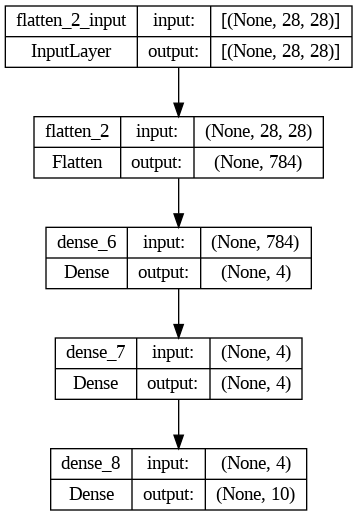

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(multi_class_model2,show_shapes=True)

In [ ]:
#classification data with make_moons
from sklearn.datasets import make_moons
x,y=make_moons(n_samples=500,noise=0.01)
x,x.shape,y,y.shape

(array([[ 3.78806948e-01, -2.73999603e-01],
        [ 1.97818176e+00,  3.83689049e-01],
        [-9.90638879e-01,  3.08486680e-02],
        [ 1.81047010e+00, -7.61442143e-02],
        [ 7.53847290e-01,  6.62674072e-01],
        [ 1.33054734e+00, -4.28738854e-01],
        [ 1.19411623e-01,  3.90284654e-02],
        [ 2.01586429e-01,  9.89750179e-01],
        [ 1.23434871e+00, -4.82880141e-01],
        [ 2.47321156e-03,  9.97591523e-01],
        [ 2.99952911e-02,  2.94359946e-01],
        [ 9.46112947e-01, -4.90291790e-01],
        [ 4.37884663e-01, -3.23880368e-01],
        [ 1.87706389e+00,  3.24730269e-02],
        [-8.62348294e-01,  4.75443082e-01],
        [ 5.74883506e-01,  8.25371187e-01],
        [ 1.22739124e+00, -4.69856542e-01],
        [ 1.48065221e-02,  3.38857346e-01],
        [ 1.96499709e+00,  2.42535198e-01],
        [ 1.20887460e+00, -4.81322045e-01],
        [ 9.58537687e-02,  1.00320715e+00],
        [-7.07140969e-02,  1.00332817e+00],
        [ 9.64601619e-01,  2.892

<ipython-input-45-82e2448931ed>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[:,0],x[:,1],y,cmap=plt.cm.binary)


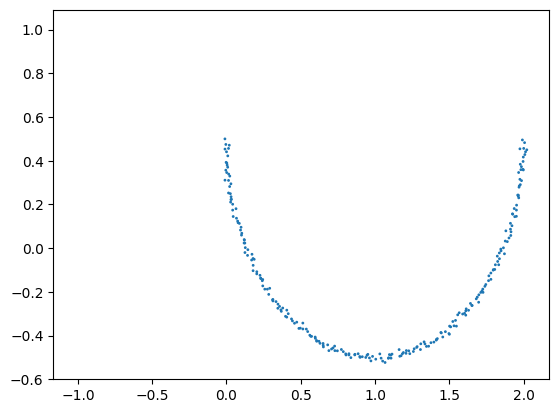

In [ ]:
plt.scatter(x[:,0],x[:,1],y,cmap=plt.cm.binary)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [ ]:
#normalisation
x_max0=x_train[:,0].max()
x_max1=x_train[:,1].max()
y_max=y_train.max()
x_train_norm=x_train/x_train.max()
y_train_norm=y_train/y_train.max()


In [ ]:
moon_model=tf.keras.Sequential(
    [

        tf.keras.layers.Dense(10,activation="relu"),
        tf.keras.layers.Dense(10,activation="relu"),
        tf.keras.layers.Dense(1,activation="sigmoid")
    ]
)
moon_model.compile(metrics=["accuracy"],optimizer="Adam",loss=tf.keras.losses.BinaryCrossentropy())
moon_history=moon_model.fit(x_train,y_train,epochs=20)

Epoch 1/20
11/11 [==============================] - 2s 6ms/step - loss: 0.6638 - accuracy: 0.5343
Epoch 2/20
11/11 [==============================] - 0s 4ms/step - loss: 0.6416 - accuracy: 0.5343
Epoch 3/20
11/11 [==============================] - 0s 5ms/step - loss: 0.6211 - accuracy: 0.5514
Epoch 4/20
11/11 [==============================] - 0s 5ms/step - loss: 0.6019 - accuracy: 0.7000
Epoch 5/20
11/11 [==============================] - 0s 5ms/step - loss: 0.5830 - accuracy: 0.7286
Epoch 6/20
11/11 [==============================] - 0s 4ms/step - loss: 0.5645 - accuracy: 0.7600
Epoch 7/20
11/11 [==============================] - 0s 4ms/step - loss: 0.5456 - accuracy: 0.7829
Epoch 8/20
11/11 [==============================] - 0s 4ms/step - loss: 0.5267 - accuracy: 0.8057
Epoch 9/20
11/11 [==============================] - 0s 4ms/step - loss: 0.5081 - accuracy: 0.8343
Epoch 10/20
11/11 [==============================] - 0s 4ms/step - loss: 0.4891 - accuracy: 0.8429
Epoch 11/20
11/11 [

In [ ]:
def softmax(x):
  return tf.math.exp(x)/tf.reduce_sum(tf.math.exp(x))
x=tf.range(0,10,0.5)
y=softmax(x)
x,x.shape,y,y.shape

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
        6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5], dtype=float32)>,
 TensorShape([20]),
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([2.9453238e-05, 4.8560178e-05, 8.0062200e-05, 1.3200025e-04,
        2.1763163e-04, 3.5881391e-04, 5.9158407e-04, 9.7535725e-04,
        1.6080922e-03, 2.6512959e-03, 4.3712482e-03, 7.2069694e-03,
        1.1882284e-02, 1.9590573e-02, 3.2299396e-02, 5.3252701e-02,
        8.7798864e-02, 1.4475586e-01, 2.3866206e-01, 3.9348719e-01],
       dtype=float32)>,
 TensorShape([20]))